# Nowoczesna Teoria Portfela i Capital Asset Pricing Model 

#### Biblioteki w Pythonie to zbiory gotowych funkcji, klas i narzędzi, które pozwalają rozwiązywać konkretne problemy bez konieczności pisania wszystkiego od zera. Do tej pory pracowaliśmy z yfinance, numpym, pandas itd. Zawsze przed napisaniem jakiegoś kodu powinniście się zastanowić czy nie istnieje biblioteka, która już rozwiązała konkretny problem. Np. poprzez zapytanie modeli językowych o pomoc. 

#### Nam w optymalizacji portfela przyda się **Riskfolio**. Riskfolio to publiczna biblioteka, dzięki której jesteście w stanie zarządzać swoimi portfelami (zarządzać ryzykiem, obliczać miary ryzyka i optymalizować wagi portfela) w relatywnie prosty sposób. Jednak pamiętajcie, że za nim jej używacie najpierw musicie się zapoznać z jej możliwościami i zrozumieniem sposobów w jaki sobie radzą z tymi problemami. Jeśli nie rozumiecie działania to nie będziecie mogli zinterpretować wyniku, który otrzymacie. Ponadto pamiętajcie, że nie musicie być perfekcyjni w znajomości tych bibliotek. W praktyce każdy użytkownik musi sprawdzać dokumentacje i przykłady użycia.

Tutaj znajdziecie link do opisu: https://riskfolio-lib.readthedocs.io/en/latest

Tutaj znajdziecie matematykę która stoi za typami portfeli: https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html

Tutaj znajdziecie przykłady użycia: https://riskfolio-lib.readthedocs.io/en/latest/examples.html

#### Teraz szybko jednak przypomnimy sobie co jest naszym celem na dzisiejszych zajęciach w przypadku NTP. 

# Nowoczesna teoria portfela

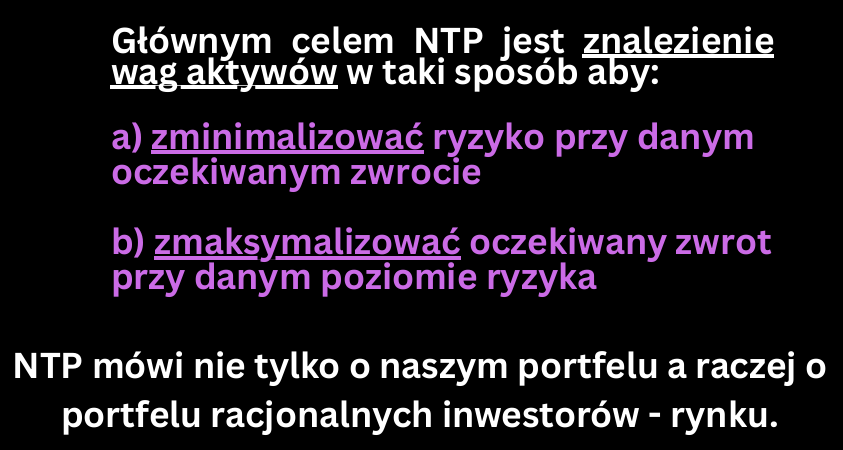

#### Więc szukamy kompromisu między ryzykiem i zwrotem dla naszego portfela. Przez to że będziemy nardzędzi takich jak solver (algorytmu numerycznego), który będzie nam optymalizować. To samo będziecie mogli zrobić w swoich excelach i ich solverach, jednak python gwarantuje nam większą swobode.

In [ ]:
pip install riskfolio-lib

In [4]:
pip install yfinance==0.2.59 

  Using cached yfinance-0.2.59-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached curl_cffi-0.10.0-cp39-abi3-win_amd64.whl.metadata (12 kB)
Using cached yfinance-0.2.59-py2.py3-none-any.whl (117 kB)
Using cached curl_cffi-0.10.0-cp39-abi3-win_amd64.whl (1.4 MB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\tomek\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf
import riskfolio as rp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'GC=F']  # 4 akcje + ETF na złoto
data = yf.download(tickers, start='2020-01-01', end='2024-12-31')['Close']
returns = data.pct_change().dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


#### Przypomnienie odnośnie funkcji: https://riskfolio-lib.readthedocs.io/en/latest/risk.html#RiskFunctions.SemiDeviation

In [ ]:
rp.RiskFunctions.SemiDeviation(returns.iloc[:,1])

In [ ]:
round(rp.RiskFunctions.CVaR_Hist(returns.iloc[:,1], alpha=0.01),4)

### Optymalizacja portfela

In [3]:
# Zbudowanie obiektu i Przypisanie obiektowi zwrotów i ustawienie sposobu kalkulacji statystyk
port = rp.Portfolio(returns=returns, budget=1, sht=False, upperlng=1)



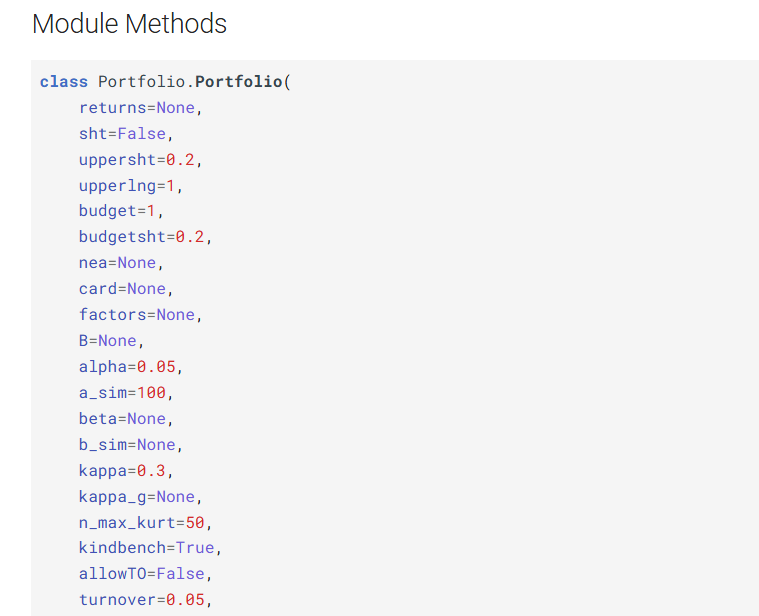

https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html

In [4]:
port.assets_stats(method_mu='hist', method_cov='hist') 

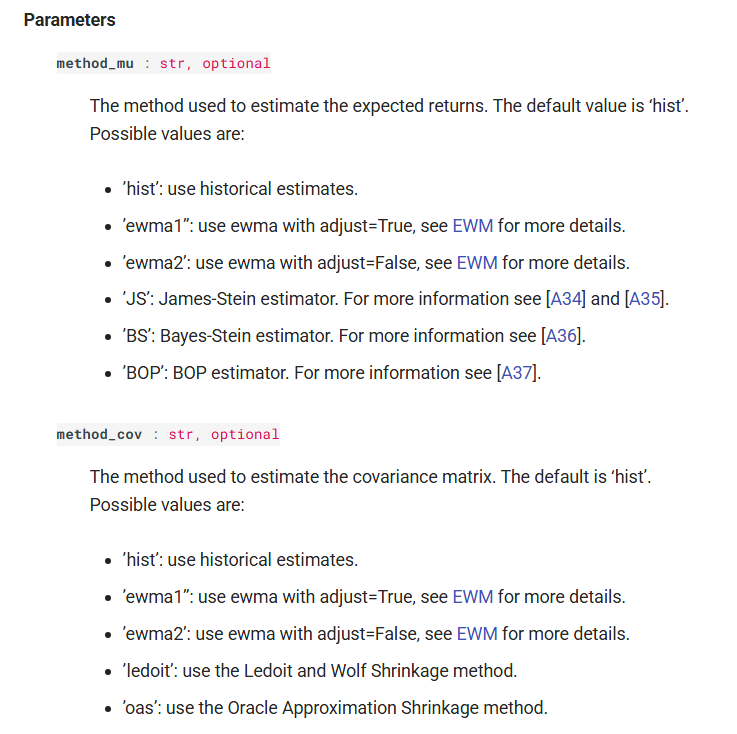

https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html

In [10]:
model = 'Classic'       # Mean-Variance
rm = 'MV'           #  ryzyka: 'MV' (variance), 'MAD', 'MSV', 'FLPM', 'SLPM', 'VaR', 'CVaR', 'EVaR', 'WR', 'DaR', 'MDD'
obj = 'Sharpe'          # Cel: 'Sharpe', 'MinRisk', 'Utility', 'MaxRet'

w = port.optimization(model=model, rm=rm, obj=obj)


In [11]:
w.round(4)

,weights
AAPL,0.2931
AMZN,0.0000
GC=F,0.5609
GOOGL,0.1074
MSFT,0.0386


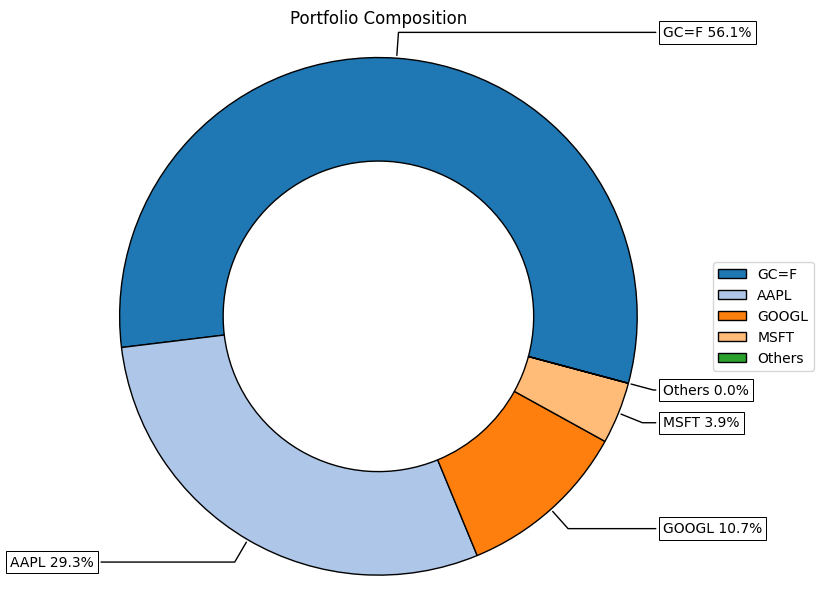

In [12]:
rp.plot_pie(w, others=0.01)
plt.show()


In [17]:
# Obliczenie sharpe
rf = 0.0439
sharpe = rp.Sharpe(returns, w['weights'], rf=rf/252)*np.sqrt(252)
sharpe

0.904722775007166

In [18]:
ws = port.efficient_frontier(model=model, rm=rm, points=50)

In [21]:
port.mu

,AAPL,AMZN,GC=F,GOOGL,MSFT
0,0.001189,0.000931,0.00048,0.001031,0.000995


<Axes: >

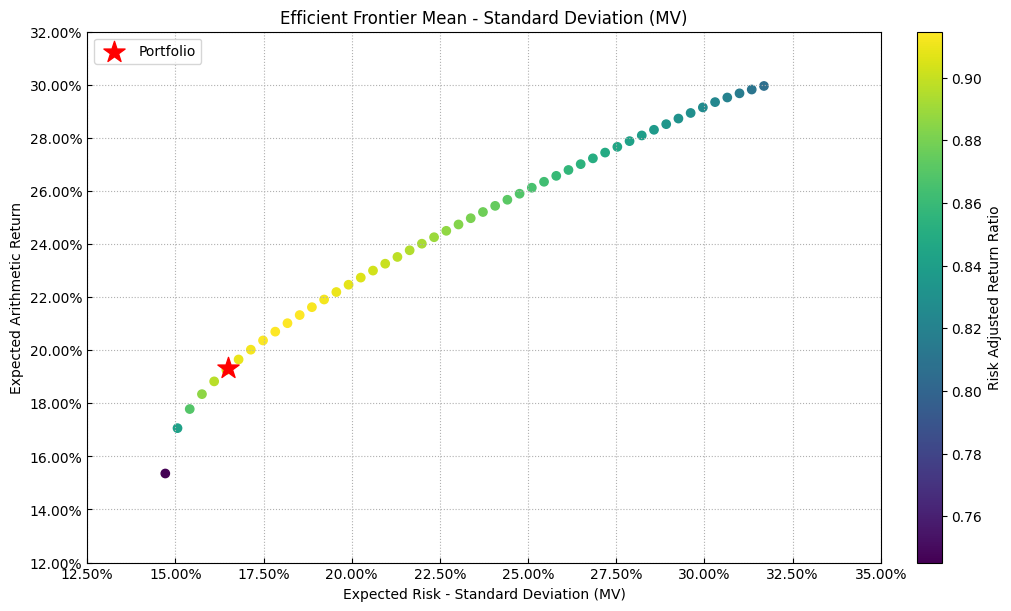

In [22]:
# Generowanie efficient frontier
ws = port.efficient_frontier(model=model, rm=rm, points=50)

rp.plot_frontier(w_frontier=ws,
                 mu=port.mu,
                 cov=port.cov,
                 returns=returns,
                 rm=rm,
                 rf=rf,
                 w=w,
)


In [23]:
# Poszczególne wagi dla portfela
ws.round(4)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AAPL,0.0701,0.1668,0.2072,0.2387,0.2656,0.2898,0.3119,0.3325,0.3521,0.3707,...,0.7641,0.7748,0.7855,0.7962,0.8068,0.8468,0.8906,0.9301,0.9663,1.0
AMZN,0.0127,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
GC=F,0.7766,0.6848,0.6452,0.6143,0.5879,0.5642,0.5425,0.5222,0.5030,0.4848,...,0.0514,0.0392,0.0271,0.0150,0.0029,0.0000,0.0000,0.0000,0.0000,0.0
GOOGL,0.0537,0.0791,0.0881,0.0952,0.1012,0.1066,0.1116,0.1163,0.1206,0.1248,...,0.1846,0.1860,0.1875,0.1888,0.1903,0.1532,0.1094,0.0699,0.0337,0.0
MSFT,0.0868,0.0693,0.0595,0.0518,0.0453,0.0394,0.0340,0.0290,0.0243,0.0198,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


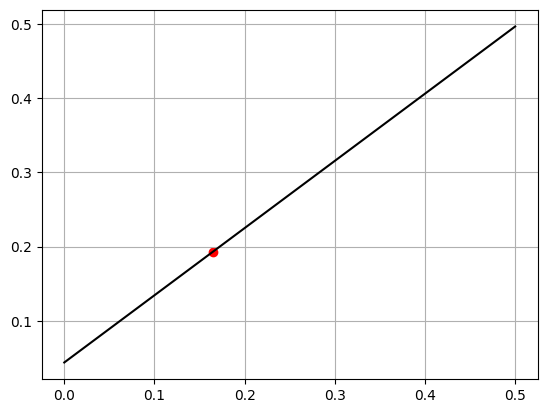

In [28]:
# Punkty CAL
x = np.linspace(0, 0.5, 100)
y = rf + (sharpe * x)

plt.plot(x, y, label='CAL', color='black')
plt.grid()

mu = port.mu
cov = port.cov

mean_returns = mu @ w['weights']*252
std_dev = np.sqrt(w['weights'].T @ cov @ w['weights'])*np.sqrt(252)

plt.scatter(std_dev, mean_returns, marker='o', color='red')

In [37]:
# Ile zainwestować w każdą akcję
(w['weights']*20000/data.iloc[1]).round(0)

AAPL     81.0
AMZN      0.0
GC=F      7.0
GOOGL    32.0
MSFT      5.0
dtype: float64

<Axes: >

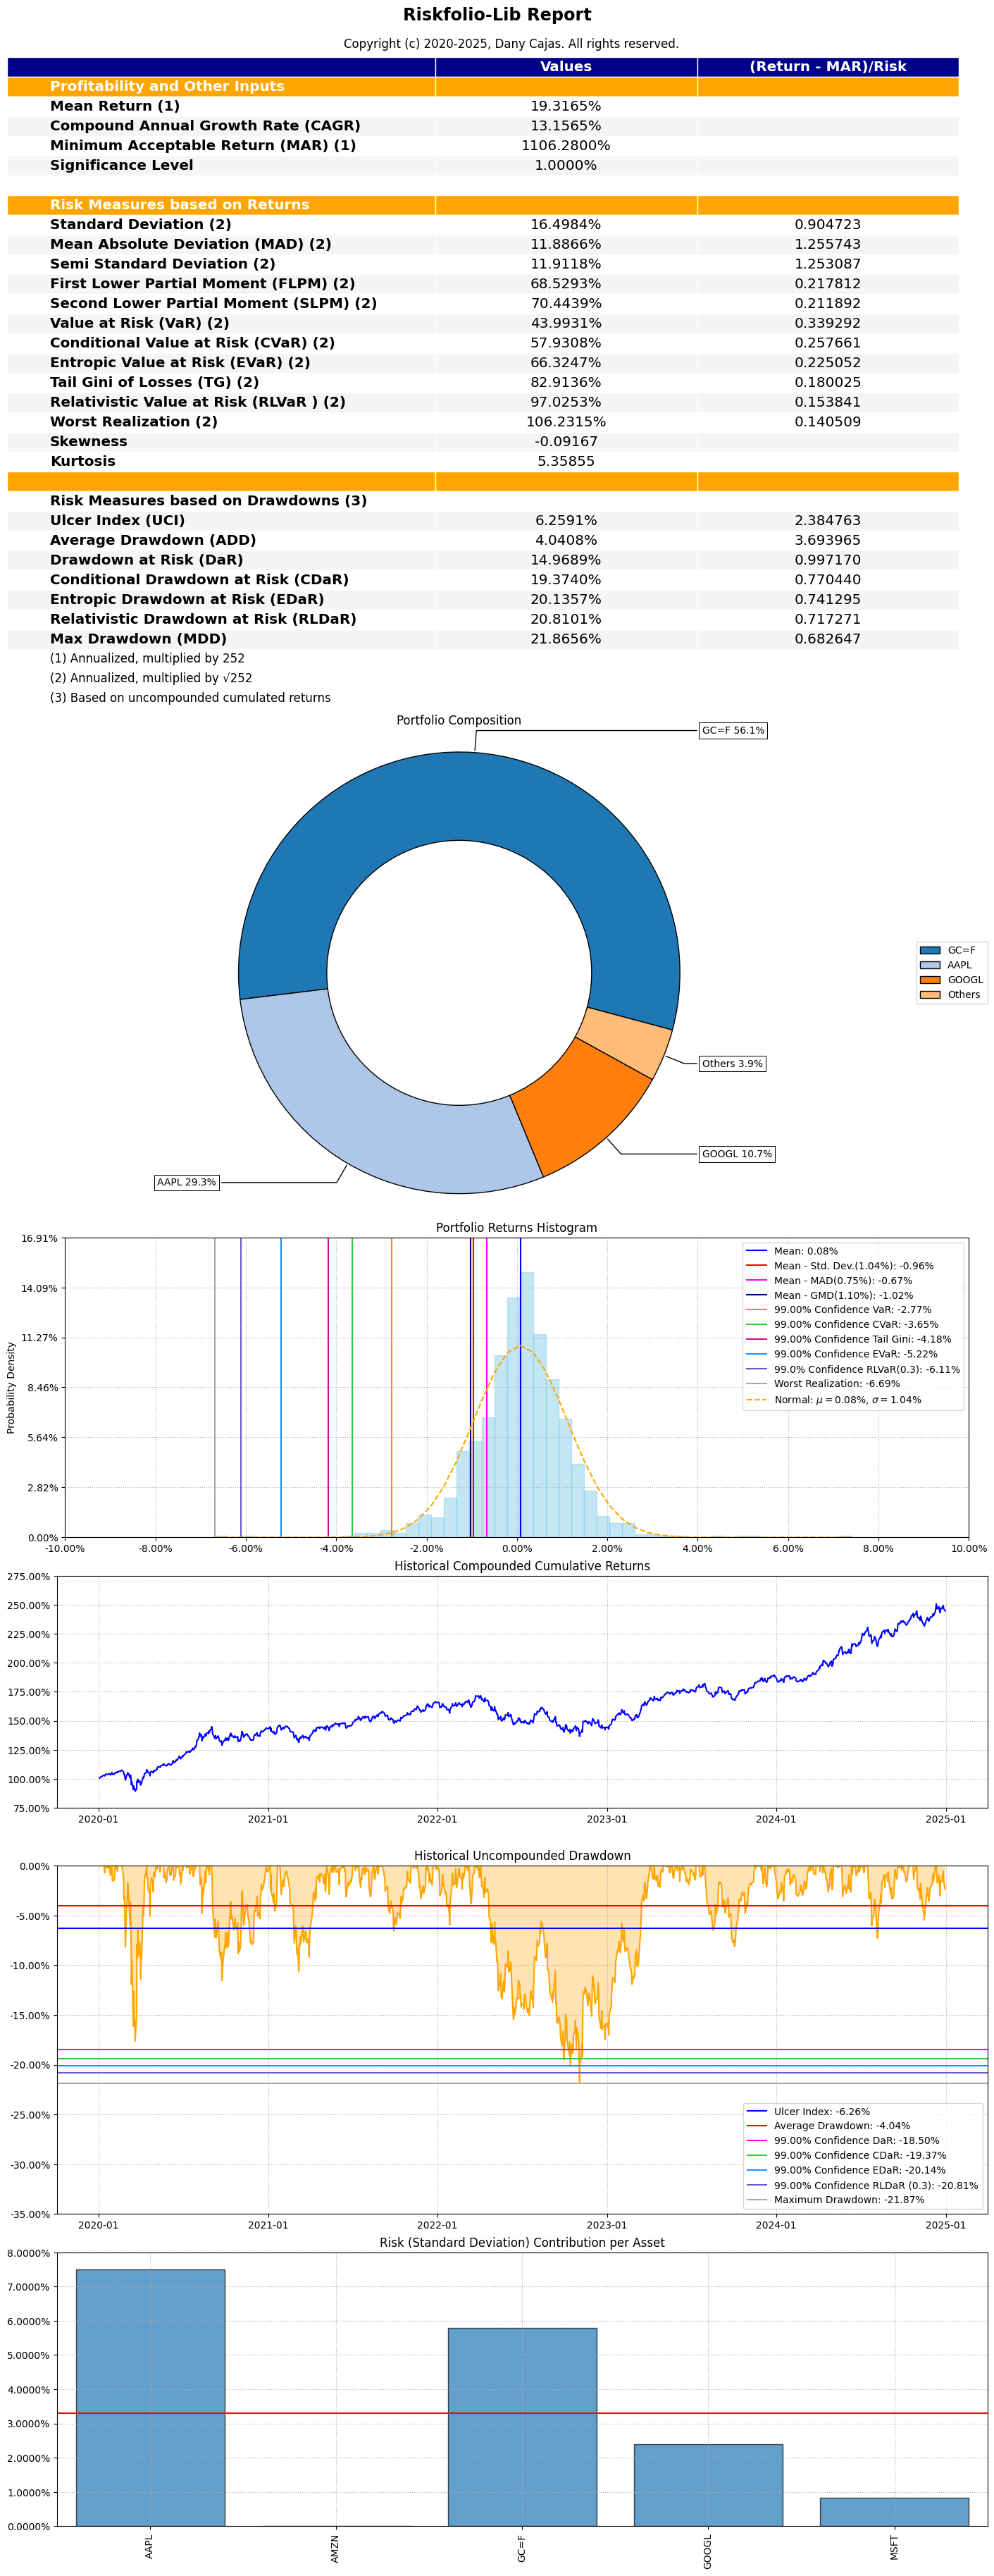

In [39]:
# Raport w formie wykresu
rp.jupyter_report(
    returns=returns,
    w=w,
    rm=rm,
    rf=rf,
    alpha=0.01
)

In [42]:
#Raport do excela
rp.excel_report(
    returns=returns,
    w=w,
    rf=rf,
    alpha=0.01,
    name='Portfolio'
)

## CAPM

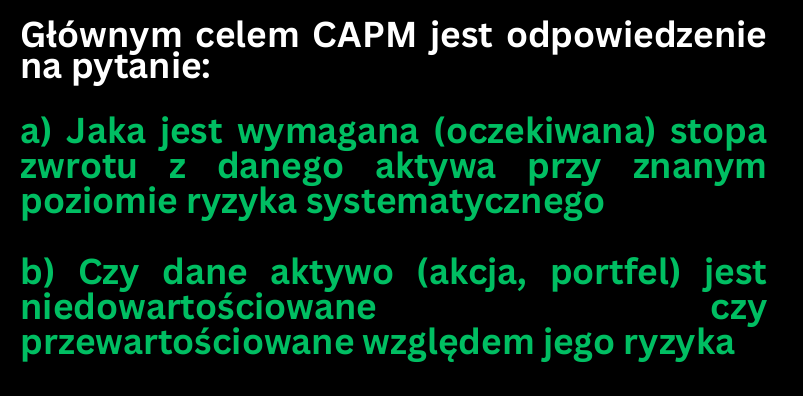

In [44]:
# Parametry wejściowe
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'JPM']
benchmark = '^GSPC'
start, end = '2020-01-01', '2025-01-01'
rf_annual = 0.0439
weights = np.array([0.2, 0.3, 0.2, 0.1, 0.2])  # Przykładowe wagi portfela

data = yf.download(tickers + [benchmark], start=start, end=end)['Close']
returns = data.pct_change().dropna()

[*********************100%***********************]  6 of 6 completed


In [46]:
# Dzienne nadwyżkowe zwroty
rf_daily = rf_annual/252
excess_returns = returns - rf_daily
market_excess = excess_returns[benchmark]


Wzór na betę:

$$\beta_i = \frac{\text{Cov}(R_i, R_m)}{\text{Var}(R_m)}$$

gdzie:  
- $\beta_i$ – współczynnik beta aktywa *i*, czyli miara jego wrażliwości na zmiany rynku  
- $R_i$ – stopa zwrotu z aktywa *i*  
- $R_m$ – stopa zwrotu z rynku (np. indeks S&P 500)  
- $\text{Cov}(R_i, R_m)$ – kowariancja stopy zwrotu aktywa z rynkiem  
- $\text{Var}(R_m)$ – wariancja stopy zwrotu rynku  


In [ ]:
import statsmodels.api as sm

betas, alphas = {}, {}
for ticker in tickers:
    y = excess_returns[ticker]
    X = sm.add_constant(market_excess)
    model = sm.OLS(y, X).fit()
    betas[ticker] = model.params[1]
    alphas[ticker] = model.params[benchmark]  

betas

C:\Users\tomek\AppData\Local\Temp\ipykernel_8836\381112137.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
C:\Users\tomek\AppData\Local\Temp\ipykernel_8836\381112137.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
C:\Users\tomek\AppData\Local\Temp\ipykernel_8836\381112137.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
C:\User

{'AAPL': 1.1733122108847374,
 'MSFT': 1.1740974493622953,
 'AMZN': 1.0811174662416656,
 'GOOG': 1.1267029109064808,
 'JPM': 1.0805221483382736}

In [54]:
# Premia rynkowa
market_premium = market_excess.mean()*252
market_premium

0.09743923598342345

In [55]:
# Oczekiwane zwroty wg CAPM
expected_returns = { t:rf_annual + betas[t] * market_premium for t in tickers}
expected_returns

{'AAPL': 0.15822664539863024,
 'MSFT': 0.15830315843594825,
 'AMZN': 0.14924325991892248,
 'GOOG': 0.15368507081902671,
 'JPM': 0.14918525259724874}

In [58]:
# Tabela wyników
results = pd.DataFrame({'beta': betas, 'exp_return_CAPM': expected_returns})

In [59]:
results

,beta,exp_return_CAPM
AAPL,1.173312,0.158227
MSFT,1.174097,0.158303
AMZN,1.081117,0.149243
GOOG,1.126703,0.153685
JPM,1.080522,0.149185


In [60]:
# Parametry portfela
port_beta = float(np.dot(weights, results['beta']))
port_beta

1.131889890992272

In [63]:
port_exp_return = float(np.dot(weights, results['exp_return_CAPM']))
port_exp_return *100

15.419048619564746

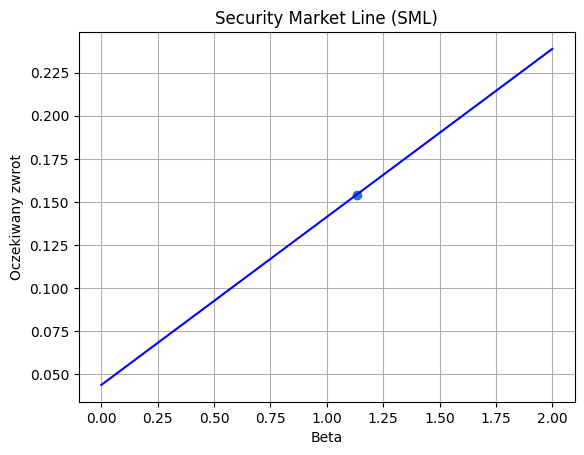

In [74]:
import matplotlib.pyplot as plt

betas_grid = np.linspace(0, 2.0, 100)
sml_y = rf_annual + betas_grid*market_premium
plt.plot(betas_grid, sml_y, label='SML', color='blue')

plt.title('Security Market Line (SML)')
plt.xlabel('Beta')
plt.ylabel('Oczekiwany zwrot')
plt.grid()


plt.scatter(port_beta, port_exp_return)

plt.show()

